<h1>3. Classifying Digit Images Using Decision Trees</h1>
<h3><b> Preprocessing Steps:</b></h3>
<ul>
    <li>Normalize pixel values.</li>
    <li>Reshape data as needed for model input.</li>
</ul>
<h3><b>Task:</b> Implement a decision tree classifier to classify handwritten digits and evaluate the model using accuracy and confusion matrix.</h3>

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Loading the dataset
mnist_train_dataset = pd.read_csv('..\\..\\Datasets\\MNIST Dataset\\MNIST_train.csv')
mnist_test_dataset = pd.read_csv('..\\..\\Datasets\\MNIST Dataset\\MNIST_test.csv')

print('Train Dataset:',mnist_train_dataset.shape)
print('Test Dataset:',mnist_test_dataset.shape)

Train Dataset: (60000, 785)
Test Dataset: (10000, 785)


In [3]:
# Printing information of the dataset
print(mnist_train_dataset.info(), '\n')
print(mnist_test_dataset.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB
None 



In [4]:
# Printing basic statistics of the dataset
print(mnist_train_dataset.describe().to_string(), '\n')
print(mnist_test_dataset.describe().to_string(), '\n')

              label      1x1      1x2      1x3      1x4      1x5      1x6      1x7      1x8      1x9     1x10     1x11     1x12          1x13          1x14          1x15          1x16     1x17     1x18     1x19     1x20     1x21     1x22     1x23     1x24     1x25     1x26     1x27     1x28      2x1      2x2      2x3      2x4           2x5           2x6           2x7           2x8           2x9         2x10          2x11          2x12          2x13          2x14          2x15         2x16          2x17          2x18          2x19          2x20          2x21          2x22          2x23          2x24     2x25     2x26     2x27     2x28      3x1      3x2           3x3           3x4           3x5           3x6           3x7           3x8           3x9          3x10          3x11          3x12          3x13          3x14          3x15          3x16          3x17         3x18          3x19          3x20          3x21          3x22          3x23          3x24          3x25          3x26     3

C:\Users\Abdul Rehman Tahir\AppData\Local\Temp\ipykernel_32904\1011195425.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  indexes = filtered_df.groupby('label').apply(lambda x: x.index[0]).tolist()


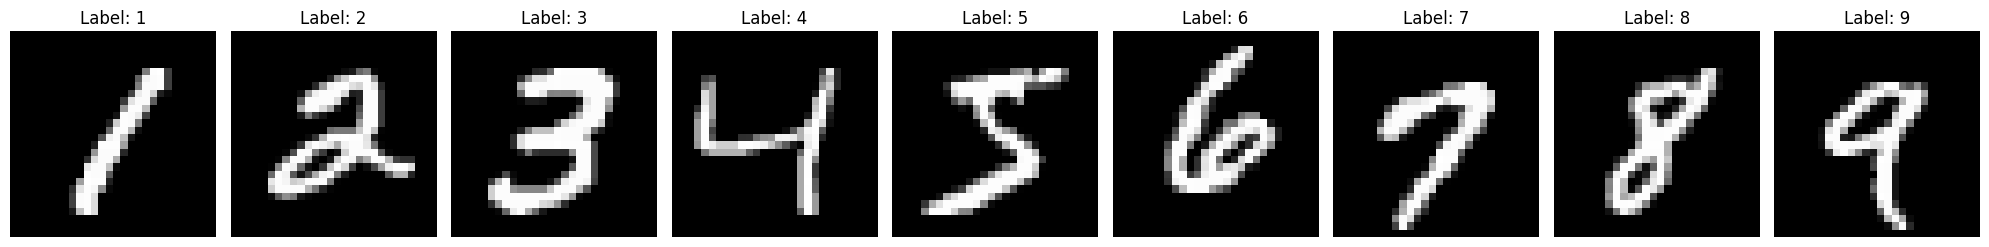

In [5]:
# Showing the digital images corresponding to the labels in the data
labels_to_find = [1, 2, 3, 4, 5, 6, 7, 8, 9]
filtered_df = mnist_train_dataset[mnist_train_dataset['label'].isin(labels_to_find)]   # Finding indexes of particular labels

indexes = filtered_df.groupby('label').apply(lambda x: x.index[0]).tolist()

fig, axes = plt.subplots(1, len(indexes), figsize=(20, 5))
for i, index in enumerate(indexes):
    image = mnist_train_dataset.iloc[index, 1:].values.reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {mnist_train_dataset.iloc[index]["label"]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

<h2>Data Preprocessing</h2>

In [6]:
# Checking for missing values in the dataset
print('Training dataset missing values:', mnist_train_dataset.isnull().sum().sum())
print('Test dataset missing values:', mnist_test_dataset.isnull().sum().sum())

Training dataset missing values: 0
Test dataset missing values: 0


-> Since there are no missing values, we can proceed to the data preprocessing steps.

In [7]:
# Separating the features and target variables from train and test dataset first i.e, splitting the dataset.
X_train = mnist_train_dataset.drop('label', axis=1)
Y_train = mnist_train_dataset['label']

X_test = mnist_test_dataset.drop('label', axis=1)
Y_test = mnist_test_dataset['label']

<h3>1. Normalize pixel values</h3>

In [8]:
# Applying Normalization (making values ranges from 0 to 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Saving the preprocessed data
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [9]:
# Printing basic statistics of the data
print(X_train.describe().to_string(), '\n')
print(X_test.describe().to_string(), '\n')

           1x1      1x2      1x3      1x4      1x5      1x6      1x7      1x8      1x9     1x10     1x11     1x12          1x13          1x14          1x15          1x16     1x17     1x18     1x19     1x20     1x21     1x22     1x23     1x24     1x25     1x26     1x27     1x28      2x1      2x2      2x3      2x4           2x5           2x6           2x7           2x8           2x9          2x10          2x11          2x12          2x13          2x14          2x15          2x16          2x17          2x18          2x19          2x20          2x21          2x22          2x23          2x24     2x25     2x26     2x27     2x28      3x1      3x2           3x3           3x4           3x5           3x6           3x7           3x8           3x9          3x10          3x11          3x12          3x13          3x14          3x15          3x16          3x17          3x18          3x19          3x20          3x21          3x22          3x23          3x24          3x25          3x26     3x27     3x2

-> Data has been normalized since all the pixel values are in [0, 1] range.

<h3>2. Reshape Data for Model Input</h3>

-> No reshaping is necessary as the data is already in the shape (n_samples, n_features). So, we can directly fit the decision tree model on this training set.

<h2>Model Training</h2>

In [10]:
# Implementing the model
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [11]:
# Predicting the target variable 
Y_pred = dtc_model.predict(X_test)

<h2>Model Evaluation</h2>

<h3>1. Accuracy Score</h3>

In [12]:
# Calculating the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.8793


<h3>2. Confusion Matrix</h3>

In [13]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[ 916    0    6    5    8   11   13    2   10    9]
 [   0 1090    8    7    2    4    6    4   13    1]
 [  12   11  881   37   16   11    8   24   24    8]
 [   7    4   26  866    6   48    2    9   24   18]
 [   3    3    8    3  862    7   19    9   27   41]
 [  14    8    5   43    2  748   21    5   24   22]
 [  19    4   10    5   19   17  851    1   28    4]
 [   2   11   26   20    8    5    2  928    6   20]
 [   8    6   27   44   20   21   16    8  793   31]
 [  21    3   11   22   35   12    6   18   23  858]]


-> Interpreting confusion matrix:
<p> <b>Diagonal Elements:</b> These represent the number of correctly classified instances for each digit. For example, the matrix shows that 917 instances of digit '0' were correctly classified as '0'. <br><br>
<b>Off-Diagonal Elements:</b> These represent misclassifications. For instance, in the first row, the model misclassified digit '0' as digit '2' 6 times, as digit '3' 6 times, and so on.</p>

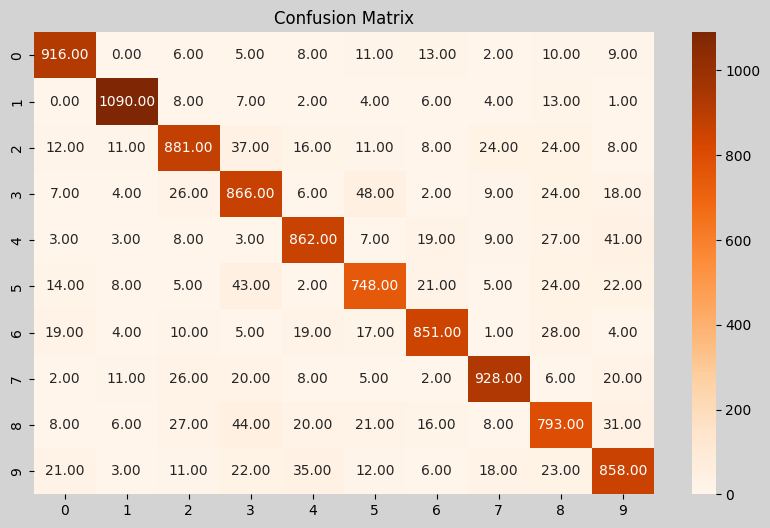

In [14]:
plt.figure(figsize=(10, 6), facecolor='lightgray')
sns.heatmap(conf_matrix, cmap='Oranges', annot=True, fmt='.2f')
plt.title('Confusion Matrix')
plt.show()

-> The decision tree classifier achieved an accuracy of 87.84%, indicating it performs well in classifying handwritten digits. The confusion matrix shows that the model correctly classifies most digits, with some confusion between similar-looking digits like 3, 5, and 8. Errors are more frequent in digits that have visually similar features, suggesting the model might benefit from more sophisticated preprocessing or model tuning.

<hr>